# Uso de KNN como clasificador

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

En este notebook se aplciará un algoritmo de clasificación realizando:

1.   Pre procesamiento.
2.   Entrenamiento del algoritmo
3.   Testeo del algoritmo.
4.   Cálculo de las métricas de rendimiento.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (2.2.2)
- numpy (2.0.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score

##Información del dataset:
[AQUí](https://www.kaggle.com/shrutimechlearn/churn-modelling)

In [2]:
!wget https://www.dropbox.com/s/rv4ubf4htkia1af/3.4.3%20Churn_Modelling.csv

--2025-05-14 15:51:58--  https://www.dropbox.com/s/rv4ubf4htkia1af/3.4.3%20Churn_Modelling.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ssopl6ovpuoouuj2u90ee/3.4.3-Churn_Modelling.csv?rlkey=hxlfop7etshrooui8f224ciar [following]
--2025-05-14 15:51:59--  https://www.dropbox.com/scl/fi/ssopl6ovpuoouuj2u90ee/3.4.3-Churn_Modelling.csv?rlkey=hxlfop7etshrooui8f224ciar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc761bfafc4c45e3a1fc152af066.dl.dropboxusercontent.com/cd/0/inline/Cpqggg_GzN2VLYob0OA61GxwZRVIfay_hWH5HYdeY-TvCIE7TDsnpaH-wR0k1DpH4sZs_-zqE5M6bj-jst2nFIURXIJcd_QigVKmMD73lsMopwwF6v7g0SRxks64GO6ge472Juj4y0G9_aqvrpnbY6UJ/file# [following]
--2025-05-14 15:51:59--  https://uc761bfafc4c45e3a1fc152af06

In [3]:
# Carga los datos
data = pd.read_csv("3.4.3 Churn_Modelling.csv", sep=",")

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [6]:
# Extrae la variable que se va a estimar.
y = data['Exited']

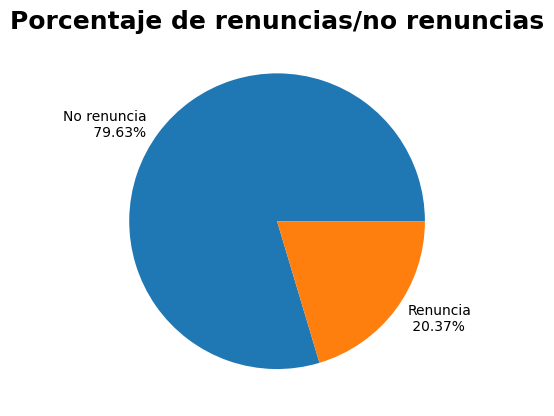

In [8]:
# Gráfico de torta del porcentaje de renuncia de clientes
clases = np.array([data[data.Exited == 0.0].shape[0],
                   data[data.Exited == 1.0].shape[0]])

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'No renuncia\n ' + labels[0]
labels[1] = 'Renuncia\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de renuncias/no renuncias', fontsize=18, fontweight="bold")
plt.show()

In [9]:
# Elimina variables que no entregan información importante.
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


## Transformación de variable `Geography`

In [10]:
# Crea el objeto
ohe = OneHotEncoder()
# Toma la variable a encodear
geo = np.array(X.Geography)
# Transforma como vector fila
geo = geo.reshape(-1,1)
# Crea el modelo de encodeo
ohe.fit(geo)
# Aplica el encodeo
geo = ohe.transform(geo).toarray()
geo

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [11]:
# Concatena geo con X
X = pd.concat([X, pd.DataFrame(geo)], axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


In [12]:
# Cambia nombres de las variables creadas.
X.rename(columns={0: 'France', 1: 'Germany', 2:'Spain'}, inplace=True)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


In [13]:
X = X.drop(columns = ['Geography'])
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,Female,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


## Transformación variable `Gender`

In [14]:
ohe = OneHotEncoder()
gen = np.array(X.Gender)
gen = gen.reshape(-1,1)
ohe.fit(gen)
gen = ohe.transform(gen).toarray()
gen

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [17]:
X = pd.concat([X, pd.DataFrame(gen)], axis=1)
X.rename(columns={0: 'Female', 1: 'Male'}, inplace=True)
X = X.drop(columns = ['Gender'])
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,0.0,1.0


# Comentarios hasta el momento

+ Ahora todas las variables son numéricas. Es posible, ahora, pasar a la tarea de clasificación con el algoritmo K-NN.

+ **❓¿Haría algo más a los datos?**

In [18]:
# Separa los datos entre training y testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29, stratify = y)

In [19]:
# Crea el objeto
modelo = KNeighborsClassifier()
# Entrena el modelo
modelo.fit(X_train, y_train)
# Realiza predicciones de los datos de test
y_pred = modelo.predict(X_test)

In [20]:
print(confusion_matrix(y_test, y_pred))

[[1487  106]
 [ 370   37]]


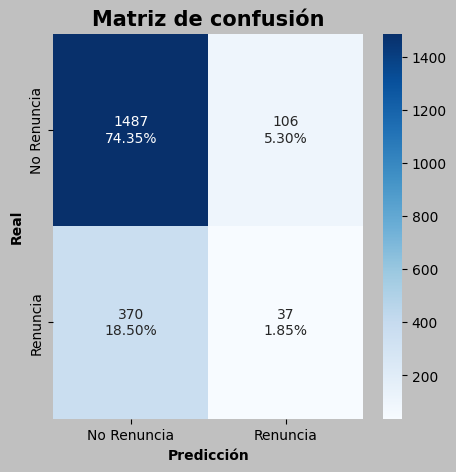

In [21]:
plt.figure(figsize=(5,5),facecolor= 'silver')
clases = ["No Renuncia", "Renuncia"]
matriz = confusion_matrix(y_test, y_pred)
matriz_x = np.array(matriz)
group_counts = ["{0:0.0f}".format(value) for value in matriz_x.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_x.flatten()/matriz_x.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("Matriz de confusión", fontsize=15, fontweight="bold")
plt.xlabel("Predicción", fontsize=10, fontweight="bold")
plt.ylabel("Real", fontsize=10, fontweight="bold")
plt.show()


##¿Qué se puede decir del resultado?

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

1487 106 370 37


## Recordando la matriz de confusión

![](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

In [23]:
print(classification_report(y_test, y_pred, target_names = ['No renuncia', 'Renuncia']))

              precision    recall  f1-score   support

 No renuncia       0.80      0.93      0.86      1593
    Renuncia       0.26      0.09      0.13       407

    accuracy                           0.76      2000
   macro avg       0.53      0.51      0.50      2000
weighted avg       0.69      0.76      0.71      2000



In [24]:
total = tn+fp+fn+tp
errores = (fp+fn)
aciertos = (tn+tp)
print("Total =", total)
print("Cantidad de errores =", errores)
print("Cantidad de aciertos =", aciertos)
print("% de errores = {:.2f}%".format(100*errores/total))
print("% de aciertos = {:.2f}%".format(100*aciertos/total))

Total = 2000
Cantidad de errores = 476
Cantidad de aciertos = 1524
% de errores = 23.80%
% de aciertos = 76.20%


##¿Qué se puede decir del resultado?

***Respuesta***
+ Se equivoca 476 veces de un total de 2000 obervaciones lo que representa, aproximadamente, el 24%
+ Acierta 1524 veces de un tota del 2000 observaciones lo que representa, aproximadamente, el 76%

## También se puede ver como le fue al algoritmo con el training set.
## Aquí se calculan las mismas métricas

In [26]:
y_train_predicted = modelo.predict(X_train)

In [27]:
print(confusion_matrix(y_train, y_train_predicted))

[[6170  200]
 [1270  360]]


In [28]:
print(classification_report(y_train, y_train_predicted, target_names = ['No renuncia', 'Renuncia']))

              precision    recall  f1-score   support

 No renuncia       0.83      0.97      0.89      6370
    Renuncia       0.64      0.22      0.33      1630

    accuracy                           0.82      8000
   macro avg       0.74      0.59      0.61      8000
weighted avg       0.79      0.82      0.78      8000



##¿Son esperables los resultados?

✅ Para responder, falta calcular al área bajo la curva (ROC AUC)

In [29]:
# Para el testing set
roc_auc_score(y_test, y_pred)

np.float64(0.5121839867602579)

In [30]:
# Para el training set
roc_auc_score(y_train, y_train_predicted)

np.float64(0.5947308607256022)

# Acerca de la curva de ROC

La **curva ROC** indica qué tan bien puede distinguir el modelo entre dos clases, por ejemplo, si un paciente tiene cáncer o no. **Mejores** modelos pueden distinguir con precisión entre los dos, mientras que un modelo **pobre** tendrá dificultades para distinguir entre los dos.


# Ejemplo:

![](https://live.staticflickr.com/65535/48048973513_1f9d124b54_b.jpg)

## Recordar los conceptos de sensibilidad y especificidad

La ***sensibilidad o recall***, es la proporción de pacientes que se identificaron correctamente por tener cáncer, es decir, verdadero positivo, sobre el número total de pacientes que realmente tienen la enfermedad.

Por su parte, ***especificidad*** es la proporción de pacientes que se identificaron correctamente por no tener cáncer, verdadero negativo, sobre el número total de pacientes que no tienen la enfermedad.

**Fórmulas**

$sensibilidad = \frac{tp}{(tp+fn)}$

$especificidad = \frac{tn}{(tn+fp)}$




Si se vuelve a la gráfica anterior, si se disminuye el valor del umbral, se obtienen **más valores negativos, aumentando la sensibilidad, pero disminuyendo la especificidad.**

![](https://live.staticflickr.com/65535/48048973193_8246b103b7_c.jpg)

## Área bajo la curva

El AUC es el área bajo la curva ROC. Este puntaje entrega una buena idea de qué tan bien funciona el modelo.

Este método es conveniente por las siguientes razones:

+ Es invariable con respecto a la escala, mide qué tan bien se clasifican las predicciones, en lugar de sus valores absolutos.
+ Es invariable con respecto al umbral de clasificación, mide la calidad de las predicciones del modelo, sin tener en cuenta qué umbral de clasificación se elige.

A continuación algunos ejemplos:

### Ejemplo 1

![](https://live.staticflickr.com/65535/48049010727_ef276cb443_b.jpg)

Esta es una situación ideal. Cuando dos curvas no se superponen en absoluto, el modelo tiene una medida ideal de separación. Es perfectamente capaz de distinguir entre clase positiva y clase negativa.

### Ejemplo 2

![](https://live.staticflickr.com/65535/48048972478_80ec37664c_b.jpg)

Cuando dos distribuciones se superponen, aparecen los los errores. Dependiendo del umbral, es posible minimizarlos o maximizarlos. Cuando AUC es 0.7, significa que hay 70% de probabilidad de que el modelo pueda distinguir entre clase positiva y clase negativa.

### Ejemplo 3

![](https://live.staticflickr.com/65535/48049010402_f5ff692cb6_b.jpg)

Esta es la **peor situación.** Cuando el AUC es aproximadamente 0.5, el modelo
no tiene capacidad de discriminación para distinguir entre clase positiva y
clase negativa.

### Ejemplo 4

![](https://live.staticflickr.com/65535/48048932026_19ee696fdb_b.jpg)

Cuando AUC es aproximadamente 0, el modelo en realidad está correspondiendo las clases. Significa que el modelo predice la clase negativa como una clase positiva y viceversa.

## Notas acerca de KNN

+ El [algoritmo]((https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) por defecto usa un valor de K igual a 5.
+ ✅ Un valor de K grande aumenta la probabilidad de underfitting
+ ✅ Un valor de K pequeño aumenta la probabilidad de overfitting

## Comprobación del algunas métricas

In [31]:
recall_manual = tp/(tp+fn)
print("Recall manual : {:.4f}".format(recall_manual))
print("Recall : {:.4f}".format(recall_score(y_test, y_pred)))

Recall manual : 0.0909
Recall : 0.0909
